In [1]:
# 忽略 warning
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore" )
import pandas as pd
import numpy as np

In [2]:
#导入四个表格
df_user_info = pd.read_csv ( 'user_info.csv')
df_visit_info = pd.read_csv ( 'visit_info.csv')
df_result = pd.read_csv ( 'result.csv' )
df_login_day = pd.read_csv ('login_day.csv')

In [3]:
#查看各个表格的数据信息及缺失值
#1.用户的个人信息
df_user_info.info()
df_user_info.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135968 entries, 0 to 135967
Data columns (total 8 columns):
user_id              135968 non-null int64
first_order_time     135968 non-null object
first_order_price    135968 non-null float64
age_month            135968 non-null int64
city_num             107759 non-null object
platform_num         135968 non-null float64
model_num            135968 non-null float64
app_num              135968 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 8.3+ MB


user_id                  0
first_order_time         0
first_order_price        0
age_month                0
city_num             28209
platform_num             0
model_num                0
app_num                  0
dtype: int64

In [4]:
#2.用户的登录信息
df_login_day.info()
df_login_day.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135617 entries, 0 to 135616
Data columns (total 16 columns):
user_id                  135617 non-null int64
login_day                135617 non-null int64
login_diff_time          135617 non-null float64
distance_day             135617 non-null int64
login_time               135617 non-null int64
launch_time              135617 non-null int64
chinese_subscribe_num    135617 non-null int64
math_subscribe_num       135617 non-null int64
add_friend               135617 non-null int64
add_group                135617 non-null int64
camp_num                 135617 non-null int64
learn_num                135617 non-null int64
finish_num               135617 non-null int64
study_num                135617 non-null int64
coupon                   135617 non-null int64
course_order_num         135617 non-null int64
dtypes: float64(1), int64(15)
memory usage: 16.6 MB


user_id                  0
login_day                0
login_diff_time          0
distance_day             0
login_time               0
launch_time              0
chinese_subscribe_num    0
math_subscribe_num       0
add_friend               0
add_group                0
camp_num                 0
learn_num                0
finish_num               0
study_num                0
coupon                   0
course_order_num         0
dtype: int64

In [5]:
#3.用户的访问信息
df_visit_info.info()
df_visit_info.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135617 entries, 0 to 135616
Data columns (total 26 columns):
user_id                    135617 non-null int64
main_home                  135617 non-null int64
main_home2                 135617 non-null int64
mainpage                   135617 non-null int64
schoolreportpage           135617 non-null int64
main_mime                  135617 non-null int64
lightcoursetab             135617 non-null int64
main_learnpark             135617 non-null int64
partnergamebarrierspage    135617 non-null int64
evaulationcenter           135617 non-null int64
coupon_visit               135617 non-null int64
click_buy                  135617 non-null int64
progress_bar               135617 non-null int64
ppt                        135617 non-null int64
task                       135617 non-null int64
video_play                 135617 non-null int64
video_read                 135617 non-null int64
next_nize                  135617 non-null int64
answer_

user_id                    0
main_home                  0
main_home2                 0
mainpage                   0
schoolreportpage           0
main_mime                  0
lightcoursetab             0
main_learnpark             0
partnergamebarrierspage    0
evaulationcenter           0
coupon_visit               0
click_buy                  0
progress_bar               0
ppt                        0
task                       0
video_play                 0
video_read                 0
next_nize                  0
answer_task                0
chapter_module             0
course_tab                 0
slide_subscribe            0
baby_info                  0
click_notunlocked          0
share                      0
click_dialog               0
dtype: int64

In [6]:
#4.最终用户是否购买的信息
df_result.info()
df_result.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4639 entries, 0 to 4638
Data columns (total 2 columns):
user_id    4639 non-null int64
result     4639 non-null int64
dtypes: int64(2)
memory usage: 72.6 KB


user_id    0
result     0
dtype: int64

In [7]:
# 确保id不重复
df_user_info_id = pd.read_csv ('user_info.csv')
df_user_info_id.nunique( ).sort_values( ) #查看每一列数据有多少种（去重）（不包括空值）
#输出发现用户信息表的id确实不重复

app_num                   1
platform_num              2
first_order_price        16
age_month               358
city_num                362
model_num               648
first_order_time      86114
user_id              135968
dtype: int64

In [8]:
df_visit_info_id = pd.read_csv ('visit_info.csv')
df_visit_info_id.nunique( ).sort_values( )
#用户访问表的user_id不重复，但比用户信息表少

click_buy                       2
click_dialog                   18
coupon_visit                   40
main_mime                      54
click_notunlocked              56
baby_info                      60
lightcoursetab                 63
main_learnpark                 64
schoolreportpage               80
slide_subscribe                96
evaulationcenter               96
share                          97
mainpage                      112
partnergamebarrierspage       154
task                          160
chapter_module                203
answer_task                   208
video_read                    231
course_tab                    327
ppt                           328
next_nize                     366
video_play                    402
main_home                     405
main_home2                    467
progress_bar                 1783
user_id                    135617
dtype: int64

In [9]:
#把四张表合并成为一张表
df1 = pd.merge( df_user_info , df_visit_info , how='left', on=['user_id'] )
df2 = pd.merge( df1 , df_login_day , how='left' , on=['user_id'] )
df3 = pd.merge( df2 , df_result ,how='left' , on=['user_id'] )

In [10]:
df3.to_csv ('all_info.csv',index=False,header=True )
df_all = pd.read_csv ('all_info.csv')
df_all.head()

,user_id,first_order_time,first_order_price,age_month,city_num,platform_num,model_num,app_num,main_home,main_home2,...,math_subscribe_num,add_friend,add_group,camp_num,learn_num,finish_num,study_num,coupon,course_order_num,result
0,2000001555945280,2018/12/23 11:44,0.0,32,广州,9.2969,11.2707,1,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN
1,2000001556645228,2019/1/11 9:46,0.0,127,徐州,9.2969,4.9689,1,17.0,13.0,...,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,NaN
2,2000001558047804,2018/12/26 11:04,0.0,92,NaN,9.2969,6.6392,1,5.0,13.0,...,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2000001558146467,2018/12/31 8:47,0.0,83,NaN,9.2969,12.2222,1,72.0,43.0,...,0.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,1.0,NaN
4,2000001558146878,2019/1/28 1:53,0.0,47,NaN,13.5570,10.3925,1,36.0,28.0,...,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,NaN


In [11]:
df_all.info( )#查看合成表的各列数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135968 entries, 0 to 135967
Data columns (total 49 columns):
user_id                    135968 non-null int64
first_order_time           135968 non-null object
first_order_price          135968 non-null float64
age_month                  135968 non-null int64
city_num                   107759 non-null object
platform_num               135968 non-null float64
model_num                  135968 non-null float64
app_num                    135968 non-null int64
main_home                  135159 non-null float64
main_home2                 135159 non-null float64
mainpage                   135159 non-null float64
schoolreportpage           135159 non-null float64
main_mime                  135159 non-null float64
lightcoursetab             135159 non-null float64
main_learnpark             135159 non-null float64
partnergamebarrierspage    135159 non-null float64
evaulationcenter           135159 non-null float64
coupon_visit               135

In [12]:
df_all.select_dtypes('object').columns#找到所有非数值型变量

Index(['first_order_time', 'city_num'], dtype='object')

In [13]:
pd.isnull(df_all).sum()
#发现大概有809行数据是除了user_id以外全为空的，为无效数据，剔除

user_id                         0
first_order_time                0
first_order_price               0
age_month                       0
city_num                    28209
platform_num                    0
model_num                       0
app_num                         0
main_home                     809
main_home2                    809
mainpage                      809
schoolreportpage              809
main_mime                     809
lightcoursetab                809
main_learnpark                809
partnergamebarrierspage       809
evaulationcenter              809
coupon_visit                  809
click_buy                     809
progress_bar                  809
ppt                           809
task                          809
video_play                    809
video_read                    809
next_nize                     809
answer_task                   809
chapter_module                809
course_tab                    809
slide_subscribe               809
baby_info     

In [14]:
# 用0替代result的Nan
df_all['result'].fillna(0, inplace=True )
# 用 error替代city_num中的缺失值
df_all['city_num'].fillna('error',inplace=True)

In [15]:
df_all=df_all.dropna(how='all', subset=['main_home'])
pd.isnull(df_all).sum()#剔除809行的无效数据

user_id                    0
first_order_time           0
first_order_price          0
age_month                  0
city_num                   0
platform_num               0
model_num                  0
app_num                    0
main_home                  0
main_home2                 0
mainpage                   0
schoolreportpage           0
main_mime                  0
lightcoursetab             0
main_learnpark             0
partnergamebarrierspage    0
evaulationcenter           0
coupon_visit               0
click_buy                  0
progress_bar               0
ppt                        0
task                       0
video_play                 0
video_read                 0
next_nize                  0
answer_task                0
chapter_module             0
course_tab                 0
slide_subscribe            0
baby_info                  0
click_notunlocked          0
share                      0
click_dialog               0
login_day                  0
login_diff_tim

In [16]:
#类型转换/构造部分特征
#时间转成datetime类型
df_all['first_order_time'] = pd.to_datetime(df_all['first_order_time'])
# 年龄月−>年保留一位，后面还要进行分箱
import math
df_all['age_year'] = df_all.age_month.apply(lambda x : round( x/12 ,1))#除以12，四舍五入
# 处理重复项
print(df_all.nunique( ).sort_values( )) # 查看每一列数据有多少种（去重）（不包括空值）

app_num                         1
math_subscribe_num              2
add_friend                      2
platform_num                    2
add_group                       2
study_num                       2
result                          2
chinese_subscribe_num           2
click_buy                       2
camp_num                        7
first_order_price              16
click_dialog                   18
course_order_num               22
launch_time                    23
learn_num                      26
finish_num                     26
coupon                         33
coupon_visit                   40
login_day                      50
main_mime                      54
click_notunlocked              56
baby_info                      60
lightcoursetab                 63
main_learnpark                 64
schoolreportpage               80
evaulationcenter               96
slide_subscribe                96
share                          97
mainpage                      112
partnergamebar

In [17]:
df_all.describe()

,user_id,first_order_price,age_month,platform_num,model_num,app_num,main_home,main_home2,mainpage,schoolreportpage,...,add_friend,add_group,camp_num,learn_num,finish_num,study_num,coupon,course_order_num,result,age_year
count,1.351590e+05,135159.000000,135159.000000,135159.000000,135159.000000,135159.0,135159.000000,135159.000000,135159.00000,135159.000000,...,135159.000000,135159.000000,135159.000000,135159.000000,135159.000000,135159.000000,135159.000000,135159.000000,135159.000000,135159.000000
mean,2.000003e+15,1.319348,66.424752,10.250607,9.416212,1.0,56.710193,47.648089,5.25928,3.799473,...,0.996175,0.996175,1.608927,3.322132,2.699598,0.170126,0.159508,0.105971,0.034323,5.535480
std,2.491790e+08,9.988898,210.329853,1.775769,4.446924,0.0,51.764142,48.745976,11.07509,6.181293,...,0.061729,0.061729,0.960818,2.966833,2.888110,0.375744,0.916198,0.553700,0.182057,17.527444
min,2.000002e+15,0.000000,0.000000,9.296900,0.000000,1.0,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000002e+15,0.000000,51.000000,9.296900,6.346200,1.0,12.000000,15.000000,1.00000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000
50%,2.000002e+15,0.000000,63.000000,9.296900,8.920000,1.0,48.000000,35.000000,3.00000,1.000000,...,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.200000
75%,2.000003e+15,0.000000,78.000000,9.296900,11.440700,1.0,88.000000,66.000000,7.00000,6.000000,...,1.000000,1.000000,2.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,6.500000
max,2.000003e+15,2099.000000,24245.000000,13.557000,100.000000,1.0,2172.000000,2685.000000,2847.00000,482.000000,...,1.000000,1.000000,6.000000,25.000000,25.000000,1.000000,112.000000,24.000000,1.000000,2020.400000


In [18]:
#查看各列的数据分布情况
for col in df_all.columns:
    print(f'{col}:')
    print(df_all[col].agg(['value_counts']).T)
    print('='*70)

user_id:
              2000002555341443  2000002358612361  2000002439855490  \
value_counts                 1                 1                 1   

              2000002432301733  2000002544502030  2000002739939454  \
value_counts                 1                 1                 1   

              2000002400729212  2000002738620538  2000002491678843  \
value_counts                 1                 1                 1   

              2000002763526265        ...         2000002544543696  \
value_counts                 1        ...                        1   

              2000002409279441  2000002923321294  2000002418427852  \
value_counts                 1                 1                 1   

              2000002681865638  2000002421102737  2000002441504712  \
value_counts                 1                 1                 1   

              2000002923414276  2000002487099335  2000002763488638  
value_counts                 1                 1                 1  

[1 row

[1 rows x 231 columns]
next_nize:
              0.0    28.0   7.0    21.0   14.0   35.0   36.0   29.0   9.0    \
value_counts  46230  10057   6820   5588   5137   3235   3096   2718   2226   

              37.0   ...    592.0  290.0  363.0  238.0  422.0  245.0  347.0  \
value_counts   1876  ...        1      1      1      1      1      1      1   

              281.0  560.0  291.0  
value_counts      1      1      1  

[1 rows x 366 columns]
answer_task:
              0.0    3.0    6.0    1.0    9.0    12.0   2.0    18.0   7.0    \
value_counts  35712   7221   6147   5889   5023   4526   3995   3971   3404   

              15.0   ...    306.0  219.0  277.0  288.0  195.0  191.0  240.0  \
value_counts   3388  ...        1      1      1      1      1      1      1   

              147.0  137.0  280.0  
value_counts      1      1      1  

[1 rows x 208 columns]
chapter_module:
              0.0     1.0     2.0     3.0     4.0     5.0     6.0     7.0     \
value_counts   26822   12090 

In [19]:
#使用 3-sigma 法检测progress_bar异常值
#根据 3-sigma 法则计算出 progress_bar的上下限
lower_threshold= df_all.progress_bar.mean() - 3 * df_all.progress_bar.std()
upper_threshold= df_all.progress_bar.mean() + 3 * df_all.progress_bar.std()

for i in range(len(df_all)):
        if((df_all.iat[i,19]<lower_threshold)|(df_all.iat[i,19]>upper_threshold)):
            df_all.iat[i,19] = (df_all.iat[i+1,19] + df_all.iat[i-1,19])/2

In [20]:
#对于年龄存在的异常值做处理
#对于误填成出生年份的数据，用第一单体验课时间减去这个异常年龄
for i in range(len(df_all)):
        if((df_all.iat[i,49])>1920):
            df_all.iat[i,49] = (df_all.iat[i,1].year - df_all.iat[i,49])

#直接剔除年龄高于100的数据
df_all=df_all[df_all['age_year']<100]
df_all.shape

(135144, 50)

In [21]:
#异常值处理
#输出箱线图的上边界值
def get_quantile_high_edge ( df ):
    Q1=df.quantile(.25)
    Q3=df.quantile(.75)
    IQR=Q3-Q1
    high=Q3+1.5*IQR
    return high

In [22]:
# 替换异常值
#login_day 表
high = get_quantile_high_edge ( df_all.login_day )
df_all ['login_day'] = df_all . login_day . apply (lambda x : 0 if x<0else high if x>high else x )

high = get_quantile_high_edge ( df_all.login_diff_time )
df_all ['login_diff_time'] = df_all . login_diff_time . apply (lambda x : 0 if x<0else high if x>high else x )

import math
df_all['distance_day'] = df_all.distance_day . apply (lambda x : math.fabs(x) if x<0 else x )
high = get_quantile_high_edge ( df_all.distance_day )
df_all ['distance_day' ] = df_all . distance_day . apply (lambda x : 0 if x<0 else high if x>high else x )

# launch_time
high = get_quantile_high_edge ( df_all.launch_time )
df_all [ 'launch_time' ] = df_all . launch_time . apply(lambda x: 0 if x<0 else high if x>high else x ) 

# login_time
high = get_quantile_high_edge ( df_all.login_time )
df_all ['login_time' ] = df_all . login_time . apply (lambda x: 0 if x<0 else high if x>high else x )

In [23]:
#visit_info表
#schoolreportpage
high = get_quantile_high_edge ( df_all . schoolreportpage )
df_all [ 'schoolreportpage' ] = df_all . schoolreportpage . apply (lambda x : 0 if x<0 else high if x>high else x )

# lightcoursetab
high = get_quantile_high_edge ( df_all . lightcoursetab )
df_all ['lightcoursetab'] = df_all . lightcoursetab . apply (lambda x: 0 if x<0 else high if x>high else x )

# evaulationcenter
high = get_quantile_high_edge ( df_all . evaulationcenter )
df_all [ 'evaulationcenter' ] = df_all . evaulationcenter . apply (lambda x: 0 if x<0 else high if x>high else x)

#main_learnpark
high = get_quantile_high_edge ( df_all . main_learnpark )
df_all [ 'main_learnpark' ] = df_all . main_learnpark . apply (lambda x: 0 if x<0 else high if x>high else x )

# mainpage
high = get_quantile_high_edge ( df_all . mainpage )
df_all [ 'mainpage' ] = df_all . mainpage . apply (lambda x: 0 if x<0 else high if x>high else x )

# chapter_module
high = get_quantile_high_edge ( df_all . chapter_module )
df_all ['chapter_module'] = df_all . chapter_module . apply(lambda x: 0 if x<0 else high if x>high else x ) 

# video_read
high = get_quantile_high_edge ( df_all . video_read )
df_all [ 'video_read' ] = df_all . video_read . apply(lambda x: 0 if x<0 else high if x>high else x ) 

# baby_info
high = get_quantile_high_edge ( df_all . baby_info )
df_all [ 'baby_info' ] = df_all . baby_info . apply(lambda x: 0 if x<0 else high if x>high else x )

In [24]:
# course_tab
high = get_quantile_high_edge ( df_all . course_tab )
df_all [ 'course_tab' ] = df_all . course_tab . apply (lambda x: 0 if x<0 else high if x>high else x )

# main_mime
high = get_quantile_high_edge ( df_all . main_mime)
df_all ['main_mime'] = df_all . main_mime . apply(lambda x: 0 if x<0 else high if x>high else x ) 

#  slide_subscribe
high = get_quantile_high_edge ( df_all . slide_subscribe )
df_all ['slide_subscribe' ] = df_all . slide_subscribe. apply(lambda x: 0 if x<0 else high if x>high else x )

# main_home2
high = get_quantile_high_edge ( df_all . main_home2)
df_all [ 'main_home2' ] = df_all . main_home2 . apply(lambda x: 0 if x<0 else high if x>high else x )

# video_play
high = get_quantile_high_edge ( df_all . video_play )
df_all [ 'video_play' ] = df_all . video_play . apply(lambda x: 0 if x<0 else high if x>high else x )
 
# next_nize
high = get_quantile_high_edge ( df_all . next_nize )
df_all [ 'next_nize ' ] = df_all . next_nize . apply (lambda x: 0 if x<0 else high if x>high else x )

# answer_task
high = get_quantile_high_edge ( df_all . answer_task )
df_all [ 'answer_task' ] = df_all . answer_task . apply(lambda x: 0 if x<0 else high if x>high else x )

# main_home
high = get_quantile_high_edge ( df_all . main_home)
df_all [ 'main_home' ] = df_all . main_home . apply (lambda x: 0 if x<0 else high if x>high else x )

# ppt
high = get_quantile_high_edge ( df_all . ppt )
df_all [ 'ppt' ] = df_all . ppt . apply (lambda x: 0 if x<0 else high if x>high else x )


# share
high = get_quantile_high_edge ( df_all . share )
df_all [ 'share' ] = df_all . share . apply (lambda x: 0 if x<0 else high if x>high else x )

# click_notunlocked
high = get_quantile_high_edge ( df_all . click_notunlocked )
df_all [ 'click_notunlocked' ] = df_all . click_notunlocked . apply (lambda x: 0 if x<0 else high if x>high else x )

# task
high = get_quantile_high_edge ( df_all . task )
df_all [ 'task' ] = df_all . task . apply(lambda x: 0 if x<0 else high if x>high else x )


In [25]:
df_all=df_all.dropna(how='all', axis=1)#删去值全为空的列

In [26]:
# 修正不符合逻辑的学习课节数，完成课节数 learn_num， finish_num
def correct_finish_num ( data:pd.DataFrame ) :
    # 获取无重复学习但完成课节数大于学习课节数的异常值的索引
    idx = ( data.learn_num<data . finish_num ) & ( data.study_num == 0)
    # 对异常值的完成课节数修正为其学习课节数
    data.loc[ idx ,'finish_num' ] = data . loc [ idx , 'learn_num' ]
    return data

In [27]:
df_all = correct_finish_num ( df_all )
df = df_all
df.to_csv ( 'info_preproc.csv',index=False,header=True )

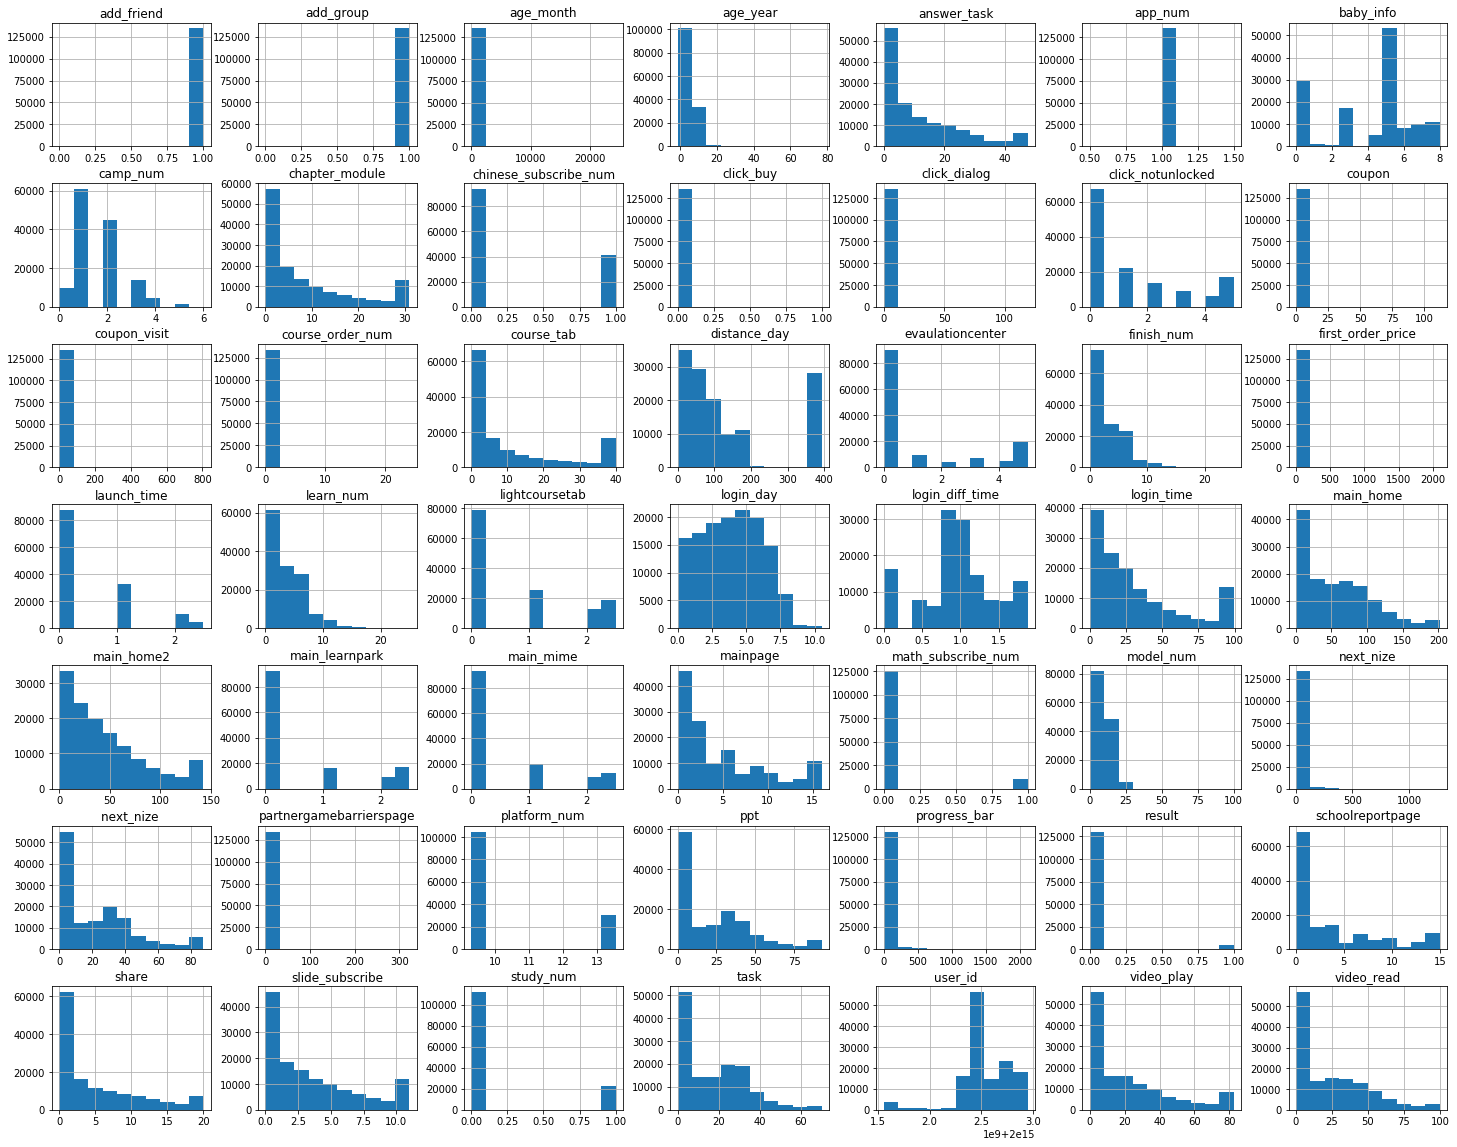

In [28]:
#查看预处理后的数据分布直方图
df_all.hist(figsize=(25,20))#bins总个数，figsize图的大小
plt.show()